In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from Fonctions_utils import f1_m, matrix_confusion
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [21]:
def matrix_confusion(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [2]:
data = pd.read_csv('df_train.csv')

In [3]:
data.head(3)

,Insult,text_clean
0,0,st extra grenade i almost punched my computer ...
1,0,are however many also take it to mean that cor...
2,1,reported you redneck coward


In [6]:
data['text_clean']=data['text_clean'].astype(str)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text_clean'])
sequences = tokenizer.texts_to_sequences(data['text_clean'])
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
labels = np.array(data['Insult'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m,'accuracy'])


In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
18/18 [==============================] - 220s 12s/step - loss: 0.6160 - accuracy: 0.7270 - val_loss: 0.5892 - val_accuracy: 0.7089
Epoch 2/10
18/18 [==============================] - 212s 12s/step - loss: 0.5210 - accuracy: 0.7415 - val_loss: 0.5505 - val_accuracy: 0.7089
Epoch 3/10
18/18 [==============================] - 213s 12s/step - loss: 0.3998 - accuracy: 0.8072 - val_loss: 0.4817 - val_accuracy: 0.8101
Epoch 4/10
18/18 [==============================] - 213s 12s/step - loss: 0.2786 - accuracy: 0.8963 - val_loss: 0.5066 - val_accuracy: 0.8011
Epoch 5/10
18/18 [==============================] - 211s 12s/step - loss: 0.1780 - accuracy: 0.9348 - val_loss: 0.5051 - val_accuracy: 0.8101
Epoch 6/10
18/18 [==============================] - 214s 12s/step - loss: 0.1122 - accuracy: 0.9620 - val_loss: 0.5421 - val_accuracy: 0.8083
Epoch 7/10
18/18 [==============================] - 216s 12s/step - loss: 0.0739 - accuracy: 0.9742 - val_loss: 0.7049 - val_accuracy: 0.7758
Epoch 

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

18/18 [==============================] - 13s 696ms/step - loss: 0.8463 - accuracy: 0.7920
Test Loss: 0.8463325500488281
Test Accuracy: 0.7920433878898621


In [14]:
y_predict_test = model.predict(X_test)
y_predict_test2 = [round(item) for sublist in y_predict_test.tolist() for item in sublist]

18/18 [==============================] - 14s 787ms/step


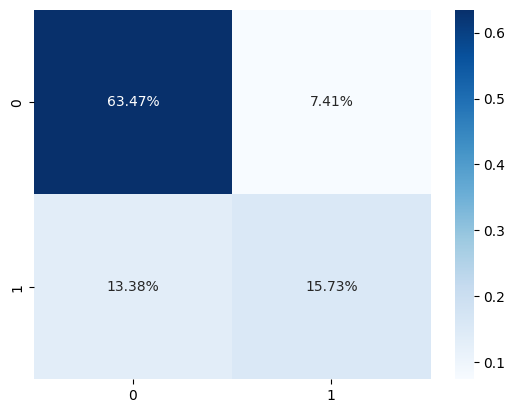

In [22]:
matrix_confusion(y_test, y_predict_test2)